# Analiza piłkarzy na podstawie danych z gry FIFA 24

## Autorzy projektu
- Oktawian Kausz (*217601*)
- Izabela Kołodziejska (*217260*)
- Piotr Kula (*217302*)
- Kamil Marszałek (*217241*)

## Streszczenie
Poznanymi metodami statystycznymi uporządkowaliśmy piłkarzy występujących w grze **FIFA 24**. Dane pozyskaliśmy z dostępnej bazy danych w serwisie [Kaggle](https://www.kaggle.com/datasets/rehandl23/fifa-24-player-stats-dataset?resource=download) udostępnionych na licencji Apache 2.0. W celu przeanalizowania dostępnych danych skorzystaliśmy z takich metod jak <u>TOPSIS</u>, <u>SSW</u> oraz <u>regresji liniowej</u> co umożliwiło nam dojście do później opisanych wniosków.

## Słowa kluczowe
- **TOPSIS** - metoda wielokryterialnej analizy decyzyjnej, która służy do wyboru najlepszego wariantu spośród zestawu alternatyw
- **SSW** - oznacza "Sum of Squares Within" (Suma Kwadratów Wewnątrzgrupowych), jest jednym z komponentów analizy wariancji (ANOVA), która służy do analizy różnic między średnimi kilku grup danych
- **Regresja liniowa** - technika statystyczna wykorzystywana do modelowania związku między jedną lub więcej zmiennymi niezależnymi (zwanych również predyktorami) a zmienną zależną za pomocą prostej funkcji liniowej

## Wprowadzenie

W świecie sportu analiza danych staje się coraz bardziej powszechną praktyką, która pozwalaja zarówno zawodnikom, jak i zespołom trenerskim na podejmowanie bardziej świadomych decyzji. W ramach niniejszego badania, skupiliśmy się na analizie piłkarzy występujących w grze FIFA 24.

### Przedmiot badania
Przedmiotem badania są piłkarze, kraje z których się wywodzą oraz kluby, których są zawodnikami.


### Cel i zakres badania 
Celem naszego badania jest porównanie piłkarzy z różnych krajów oraz klubów. Postawiliśmy sobie za cel uporządkowanie krajów od tych z których wywodzą się najlepsi zawodnicy ze świata piłki.


### Zmienne wybrane do analizy

Z dostępnych danych zostały wybrane jedynie te, które zostały uznane za znaczące a niektóre z nich, takie jak *ball_uncontrol* powstały z ich odpowiadających cech w celu uzyskania destymulanty.

Opis danych występujących w bazie:
- **player** - imię oraz nazwisko piłkarza
- **country** - narodowość lub kraj pochodzenia piłkarza
- **height** - wzrost piłkarza w centymetrach
- **age** - wiek piłkarza
- **club** - klub w którym piłkarz aktualnie gra
- **dribbling** - umiejętności piłkarza w drybblingu
- **reactions** - czas reakcji piłkarza
- **interceptions** - umiejętność piłkarza w przechwytywaniu podań
- **vision** - wizja piłkarza na boisku
- **stamina** - poziom wytrzymałości piłkarza
- **strength** - poziom siły piłkarza
- **balance** - balans piłkarza podczas gry
- **sprint_speed** - prędkość piłkarza podczas sprintów
- **agility** - poziom zwinności piłkarza
- **ball_uncontrol** - poziom braku kontroli nad piłką piłkarza
- **instability** - poziom niestabilności podczas gry

Za stymulante służą następujące dane: *dribbling*, *reactions*, *interceptions*, *vision*, *stamina*, *strength*, *balance*, *sprint_speed* oraz *agility*. Destymulantą jest z kolei *ball_uncontrol* oraz *instability*.

na razie chamski przekop z opisu:     
        • Przedmiot badania
        ◦ Cel i zakres badania
        ◦ Przegląd literatury (min. 1 cytowanie powiązane tematycznie i krótki opis co było badane) TRZEBA BYŁO WZIĄĆ JABŁKA
        ◦ Zmienne wybrane do analizy (opis i uzasadnienie zmiennych oraz podział na stymulanty/destymulanty) – minimum sześć zmiennych
        ◦ Wstępna analiza danych 
            ▪ statystyki opisowe (przynajmniej: średnia, mediana, minimum, maksimum, odchylenie standardowe, skośność)
            ▪ podstawowa wizualizacja – np. boxplot, histogramy
            ▪ braki danych – czy występują i jak je obsłużono
            ▪ obserwacje odstające i w jaki sposób je obsłużono
    • Opis metod
        ◦ wzory wraz z opisami oznaczeń
        ◦ cytowanie pracy w której zaproponowano metodę/ewentualnie pracy, w której użyto metodę)
    • Rezultaty (w postaci tabelarycznej i/lub graficznej oraz omówienie wyników)
    • Podsumowanie (ocena realizacji celu, odniesienie do pozycji z przeglądu literatury)
    • Bibliografia
W przypadku porządkowania obiektów stworzenie minimum trzech rankingów (np. z różnych metod normalizacji, różnych metod porządkowania)

## Import odpowiednich bibliotek oraz przegląd danych

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from plotly.offline import iplot, plot
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
seed = 2024

colors = ["#18eded","#f25ed0","#000000","#16A085","#34495E",
           "#21618C ","#512E5F","#45B39D","#AAB7B8 ","#20B2AA",
           "#FF69B4","#00CED1","#FF7F50","#7FFF00","#DA70D6"]

In [2]:
data = pd.read_excel('FIFA_MAD_dane.xlsx')
data.head()

,player,country,height,age,club,dribbling,reactions,interceptions,vision,stamina,strength,balance,sprint_speed,agility,ball_uncontrol,instability
0,Cristian Castro Devenish,Colombia,192,22,Atl. Nacional,43,68,65,30,55,86,40,52,43,45,50
1,Silaldo Taffarel,Brazil,181,31,Corinthians,70,70,70,64,87,81,42,67,65,31,46
2,Thomas Dähne,Germany,193,29,Holstein Kiel,12,65,20,49,38,68,41,48,36,75,52
3,Michael Sollbauer,Austria,187,33,SK Rapid Wien,48,64,66,29,73,82,56,63,57,54,30
4,Diego Segovia,Uruguay,191,23,Independiente,8,50,12,38,28,64,24,31,34,86,66


### Wstępna analiza danych

In [3]:
values = pd.read_excel('FIFA_MAD_dane.xlsx', sheet_name='wartosci')
values.head(9)

,,dribbling,reactions,interceptions,vision,stamina,strength,balance,sprint_speed,agility,ball_uncontrol,instability
0,Średnia,56.13,61.96,47.39,54.47,63.38,65.38,64.07,64.96,63.78,41.09,41.38
1,Odchylenie standardowe,18.77,8.89,20.45,13.70,16.10,12.62,14.49,15.11,14.86,16.57,12.02
2,Mediana,62.00,62.00,54.00,56.00,66.00,66.50,66.00,68.00,66.00,37.00,40.00
3,Kwartyl 25%,51.00,56.00,28.00,45.00,56.00,58.00,56.00,57.00,56.00,31.00,33.00
4,Kwatyl 50%,62.00,62.00,54.00,56.00,66.00,66.50,66.00,68.00,66.00,37.00,40.00
5,Kwatyl 75%,68.00,68.00,64.00,65.00,74.00,74.00,74.00,75.00,74.00,45.00,48.00
6,Minimum,5.00,32.00,3.00,10.00,14.00,25.00,20.00,13.00,21.00,6.00,4.00
7,Maksimum,95.00,93.00,89.00,94.00,95.00,96.00,95.00,97.00,93.00,92.00,87.00
8,Skośność,-1.22,-0.08,-0.41,-0.34,-0.95,-0.42,-0.64,-0.94,-0.67,1.40,0.50


### Boxploty

Poniżej przedstawiono graficzny rozkład posiadanych przez nas cech statystycznych. W przypadku niektórych z nich, takich jak driblling można zauważyć dużą część wartości odstających, które pokazują jak zróżnicowane są dane. Nie świadczą one o błędach pomiarowych.

<Axes: >

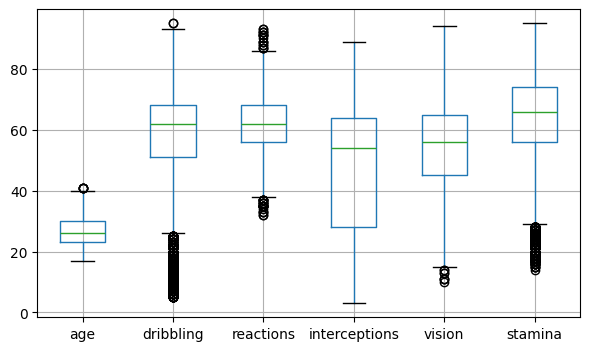

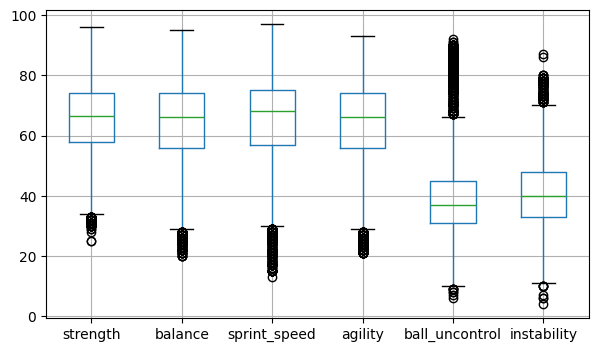

In [4]:
df = pd.DataFrame(data)
plt.figure(figsize=(7, 4))
df.boxplot(["age", "dribbling", "reactions", "interceptions", "vision", "stamina"])
plt.figure(figsize=(7, 4))
df.boxplot(["strength", "balance", "sprint_speed", "agility", "ball_uncontrol", "instability"])

### Kraje z których pochodzą piłkarze

Histogram z krajami z których pochodzą piłkarze z naszej bazy danych pokazuje, że najwięcej z nich jest kolejno z Anglii, Niemiec oraz Hiszpanii.

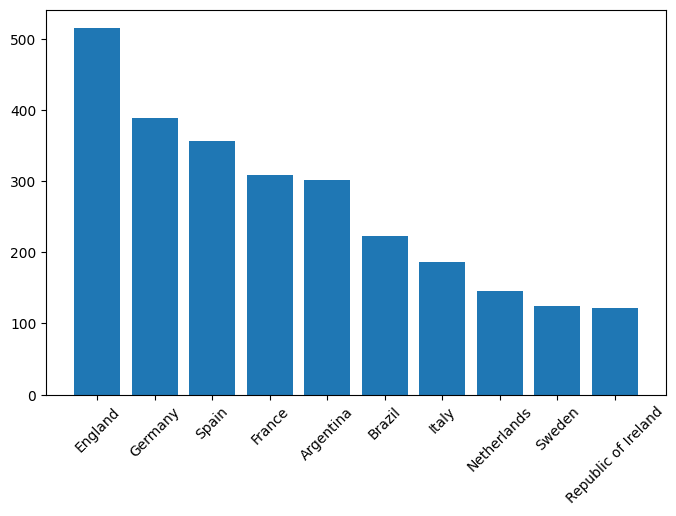

In [22]:
df = pd.DataFrame(data)
country_counts = df['country'].value_counts()
top_10_countries = country_counts.head(10)
plt.figure(figsize=(8, 5))
plt.bar(top_10_countries.index, top_10_countries)
plt.xticks(rotation=45)
plt.show()

## Usuwanie duplikatów

In [6]:
print(f"The Number of duplicated : {data.duplicated().sum()}")

The Number of duplicated : 3


W naszej bazie danych znaleźliśmy 3 duplikaty, które należy usunąć. Skorzystamy w tym celu z funkcji *drop_duplicates*, która nam to umożliwi.

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
print(f"The Number of duplicated : {data.duplicated().sum()}")

The Number of duplicated : 0


Po wykonaniu odpowiedniego polecenia, usunięto zduplikowane dane.

## Standaryzacja danych do użycia w analizie składowych głównych (PCA)

In [9]:
data_with_numbers = data.drop(['player', 'country', 'club', 'age', 'height'], axis=1)
scaler = StandardScaler()
df = scaler.fit_transform(data_with_numbers)

wykonanie PCA

In [10]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(n_components=3)

## Interpretacja wyników: które cechy mają największy wpływ na róznice między piłkarzami. 
Wykorzystywana jest analiza współczynników ładunku głównych składowych PC. Wartości te określają jak bardzo każda cecha przyczynia się do każdej głównej składowej.
- Wartości bliskie zeru wskazują na to, że dana cecha ma mały wpływ na dany komponent główny.
- Dodatnie wartości wskazują na pozytywną korelację między daną cechą a danym komponentem głównym, podczas gdy ujemne wartości wskazują na negatywną korelację.
- Im większa wartość bezwzględna, tym większy wpływ ma dana cecha na dany komponent główny.

In [11]:
loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=data_with_numbers.columns)
print(loadings_df)

   dribbling  reactions  interceptions    vision   stamina  strength  \
0  -0.378059  -0.229620      -0.203371 -0.313205 -0.331910 -0.040770   
1   0.085818  -0.369151      -0.337796  0.019068 -0.147344 -0.624370   
2   0.006284   0.462677      -0.509362  0.468285 -0.358013 -0.157744   

    balance  sprint_speed   agility  ball_uncontrol  instability  
0 -0.302756     -0.310212 -0.335583        0.380502     0.328286  
1  0.361536      0.212303  0.307902        0.024688     0.243209  
2 -0.089298     -0.251873 -0.023211        0.019319    -0.285951  


## Wnioski
- pierwsza główna składowa (indeks 0): największy wpływ na tę składową mają zmienne <b>dribbling, vision, stamina, balance, sprint_speed, agility</b>. Wszystkie te zmienne mają ujemne ładunki, co oznacza, że im wyższa jest wartość tych zmiennych, tym niższa jest wartość tej głównej składowej. Zmienne <b>ball_uncontrol i instability</b> mają dodatni ładunek, co oznacza, że im wyższa jest wartość tych zmiennych, tym wyższa jest wartość tej głównej składowej.
- druga główna składowa (indeks 1) : zmienne ujemne o największym wpływie: <b>reactions, interceptions, strength</b> zmienne dodatnie: <b>balance, agility</b>
- trzecia główna składowa (indeks 2): ujemne zmienne: <b>interceptions, stamina</b> dodatnie zmienne: <b>reactions, vision</b>
### Ogólnie wynika, że cechy takie jak reactions, interceptions, instability najbardziej wpływają na różnice między piłkarzami.

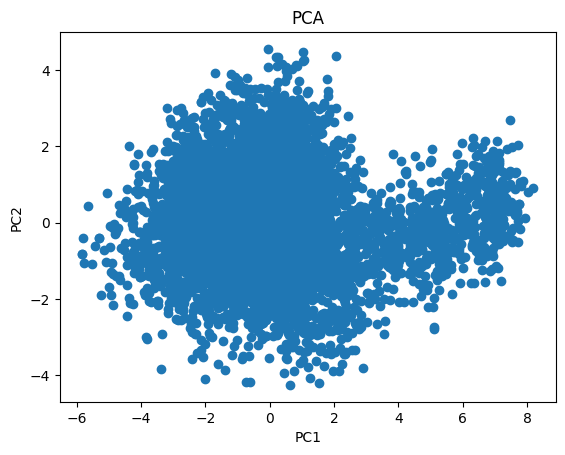

In [12]:
pca_data = pca.transform(df)
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

Metoda TOPSIS

In [13]:
#numeric_data = data.select_dtypes(include=['float64', 'int64'])  
#scaled_numeric_data = scaler.fit_transform(numeric_data)
#scaled_numeric_data

columns = ['dribbling', 'reactions', 'interceptions', 'vision', 'stamina', 'strength', 'balance', 'sprint_speed', 'agility', 'ball_uncontrol', 'instability']
numeric_data = data[columns]
scaled_numeric_data = scaler.fit_transform(numeric_data) 
scaled_numeric_data

array([[-0.69998529,  0.67945231,  0.86125537, ..., -1.39909115,
         0.23634832,  0.71684542],
       [ 0.7386117 ,  0.9043851 ,  1.10576483, ...,  0.0817222 ,
        -0.60861365,  0.38423664],
       [-2.35170777,  0.34205311, -1.33932969, ..., -1.87025904,
         2.0469811 ,  0.88314981],
       ...,
       [ 2.07064596,  2.92878027, -0.50799756, ...,  1.96639374,
        -2.1174743 , -2.85869895],
       [ 1.32470678,  3.15371307, -0.89921268, ...,  0.88943857,
        -1.69499332, -2.94185115],
       [ 1.00501855,  1.69164989, -1.33932969, ...,  0.21634159,
        -1.57428447, -2.60924237]])

height       age  dribbling  reactions  interceptions    vision stamina  strength   balance  sprint_speed   agility  ball_uncontrol instability
wagi przypisane z analizy pca 


### wagi obliczyłam z tego programu: 
import numpy as np

preferences = {
    'dribbling': 1,
    'reactions': 5,
    'interceptions': 5,
    'vision': 4,
    'stamina': 4,
    'strength': 4,
    'balance': 3,
    'sprint_speed': 3,
    'agility': 2,
    'ball_uncontrol': 1,
    'instability': 5
}

total_preference = sum(preferences.values())
normalized_preferences = {feature: weight/total_preference for feature, weight in preferences.items()}

weights = np.array(list(normalized_preferences.values()))

print("Wagi:")
print(weights)
print("Suma wag:", np.sum(weights))


In [14]:
#weights = [0.11428571, 0.11428571, 0.02857143, 0.14285714, 0.02857143, 0.14285714, 0.05714286, 0.14285714, 0.08571429, 0.05714286, 0.02857143, 0.02857143, 0.02857143]
weights = [0.02702703, 0.13513514, 0.13513514, 0.10810811, 0.10810811, 0.10810811,
 0.08108108, 0.08108108, 0.05405405, -0.02702703, -0.13513514]

idealne i nieidealne rozwiązanie

In [15]:
ideal_solution = np.max(scaled_numeric_data, axis=0)
non_ideal_solution = np.min(scaled_numeric_data, axis=0)

Obliczenie odległości od idealnego oraz nieidealnego rozwiązania

In [16]:
distance_to_ideal = np.sqrt(np.sum((scaled_numeric_data - ideal_solution) ** 2, axis=1))
distance_to_non_ideal = np.sqrt(np.sum((scaled_numeric_data - non_ideal_solution) ** 2, axis=1))

Obliczenie wyniku TOPSIS

In [17]:
topsis_score = distance_to_non_ideal / (distance_to_ideal + distance_to_non_ideal)

Dodanie kolumny z wynikiem TOPSIS do danych i sortowanie

In [18]:
data['TOPSIS Score'] = topsis_score
sorted_data = data.sort_values(by='TOPSIS Score', ascending=False)
print(sorted_data)
sorted_data.to_excel("posortowane_wedlug_topsis.xlsx", index=False)

                     player  country  height  age               club  \
3970         Mubarak Wakaso    Ghana     171   33         KAS Eupen    
1374         Luis Advíncula     Peru     180   33      Boca Juniors    
2710                  Anuar  Morocco     174   28  R. Valladolid CF    
606            Adryan Zonta   Brazil     172   31            Brazil    
5183         Jonas Svensson   Norway     170   30   Adana Demirspor    
...                     ...      ...     ...  ...                ...   
4398      Lucas Zahaczewski  Germany     186   22    SpVgg Bayreuth    
785     Jeppe Ørris Nielsen  Denmark     188   19        Randers FC    
2920        Paul Tschernuth  Austria     186   21        Heidenheim    
2676  Quentin Galvez-Diarra   France     188   21            Pau FC    
850           Edoardo Sarri    Italy     187   24              Bari    

      dribbling  reactions  interceptions  vision  stamina  strength  balance  \
3970         68         78             71      71     

dodać wykresy (2-3) z tego rankingu

metoda SSW

In [19]:
features = ['dribbling', 'reactions', 'interceptions', 'vision', 'stamina', 
            'strength', 'balance', 'sprint_speed', 'agility', 'ball_uncontrol', 'instability']
weights = dict(zip(features, weights))
data['ssw'] = numeric_data.apply(lambda row: sum(row[feature] * weight for feature, weight in weights.items()), axis=1)
ranked_players = data.sort_values(by='ssw', ascending=False)
print(ranked_players)
ranked_players.to_excel("posortowane_wedlug_ssw.xlsx", index=False)

                     player      country  height  age                club  \
3535                  Pedri        Spain     174   20       FC Barcelona    
5677          Mohamed Salah        Egypt     175   31           Liverpool   
3863      Federico Valverde      Uruguay     182   25        Real Madrid    
5136         Joshua Kimmich      Germany     177   28  FC Bayern München    
2327  Franck Yannick Kessié  Ivory Coast     183   26       FC Barcelona    
...                     ...          ...     ...  ...                 ...   
2920        Paul Tschernuth      Austria     186   21         Heidenheim    
3957   Ghjuvanni Quilichini       France     185   21         AC Ajaccio    
1025        Benjamin Leneis      Germany     195   24        FC Augsburg    
293         Harry Griffiths      England     187   18      AFC Wimbledon    
4799         Alexandru Utiu      Romania     192   20    FC Hermannstadt    

      dribbling  reactions  interceptions  vision  stamina  strength  balan

tez dodać wykresy

# Metoda regresji liniowej

In [20]:
columns = ['dribbling', 'reactions', 'interceptions', 'vision', 'stamina', 'strength', 'balance', 'sprint_speed', 'agility', 'ball_uncontrol', 'instability']
# nie uwzględniając wysokości i wieku (trzeba zmienić weigths):
# columns = ['dribbling', 'reactions', 'interceptions', 'vision', 'stamina', 'strength', 'balance', 'sprint_speed', 'agility', 'ball_uncontrol', 'instability']
X = data[columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

weights = [0.02857143, 0.14285714, 0.02857143, 0.14285714, 0.05714286, 0.14285714, 0.08571429, 0.05714286, 0.02857143, -0.02857143, -0.02857143]
data['regresja liniowa'] = (X_scaled * weights).sum(axis=1)

data_sorted = data.sort_values(by='regresja liniowa', ascending=False)

print(data_sorted)

                    player        country  height  age              club  \
5677         Mohamed Salah          Egypt     175   31         Liverpool   
5229         Kylian Mbappé         France     182   24         Paris SG    
5675         Kylian Mbapp�         France     182   24          Paris SG   
3555          Lionel Messi      Argentina     169   36         Paris SG    
4849       Kevin De Bruyne        Belgium     181   32  Manchester City    
...                    ...            ...     ...  ...               ...   
293        Harry Griffiths        England     187   18    AFC Wimbledon    
4156        Emmanuel Ochoa  United States     188   18   SJ Earthquakes    
2920       Paul Tschernuth        Austria     186   21       Heidenheim    
3957  Ghjuvanni Quilichini         France     185   21       AC Ajaccio    
4799        Alexandru Utiu        Romania     192   20  FC Hermannstadt    

      dribbling  reactions  interceptions  vision  stamina  strength  balance  \
5677  